**Importing Required Libraries:**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

**DATA CLEANING AND PRCESSING :**

In [5]:
sales_data = pd.read_csv('Amazon Sale Report.csv', encoding='latin-1')
sales_data

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,False,NaN,NaN,NaN
128972,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,False,NaN,NaN,NaN
128973,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,False,NaN,NaN,NaN
128974,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,...,INR,1199.00,Halol,Gujarat,389350.0,IN,False,NaN,NaN,NaN


In [6]:
sales_data.head(10)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN
5,5,404-1490984-4578765,04-30-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XL,Shipped,...,INR,824.00,GHAZIABAD,UTTAR PRADESH,201102.0,IN,False,NaN,NaN,NaN
6,6,408-5748499-6859555,04-30-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,L,Shipped,...,INR,653.00,CHANDIGARH,CHANDIGARH,160036.0,IN,False,NaN,NaN,NaN
7,7,406-7807733-3785945,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,S,Shipped,...,INR,399.00,HYDERABAD,TELANGANA,500032.0,IN,False,Easy Ship,NaN,NaN
8,8,407-5443024-5233168,04-30-22,Cancelled,Amazon,Amazon.in,Expedited,T-shirt,3XL,Cancelled,...,NaN,NaN,HYDERABAD,TELANGANA,500008.0,IN,False,NaN,NaN,NaN
9,9,402-4393761-0311520,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XXL,Shipped,...,INR,363.00,Chennai,TAMIL NADU,600041.0,IN,False,NaN,NaN,NaN


In [7]:
sales_data.tail(10)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
128966,128965,408-5154281-4593912,05-31-22,Cancelled,Amazon,Amazon.in,Expedited,Trousers,3XL,Unshipped,...,INR,574.0,Prayagraj (ALLAHABAD),UTTAR PRADESH,211007.0,IN,False,NaN,NaN,NaN
128967,128966,406-9812666-2474761,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,...,INR,1132.0,CHENNAI 600042,TAMIL NADU,600042.0,IN,False,NaN,NaN,NaN
128968,128967,404-5182288-1653947,05-31-22,Cancelled,Amazon,Amazon.in,Expedited,Shirt,XS,Cancelled,...,NaN,NaN,Kolkata,WEST BENGAL,700040.0,IN,False,NaN,NaN,NaN
128969,128968,403-7059995-7618722,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XL,Shipped,...,INR,824.0,Delhi,DELHI,110053.0,IN,False,NaN,NaN,NaN
128970,128969,404-3802633-7250760,05-31-22,Cancelled,Amazon,Amazon.in,Expedited,T-shirt,M,Unshipped,...,INR,612.0,MUMBAI,MAHARASHTRA,400017.0,IN,False,NaN,NaN,NaN
128971,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,517.0,HYDERABAD,TELANGANA,500013.0,IN,False,NaN,NaN,NaN
128972,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,...,INR,999.0,GURUGRAM,HARYANA,122004.0,IN,False,NaN,NaN,NaN
128973,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,...,INR,690.0,HYDERABAD,TELANGANA,500049.0,IN,False,NaN,NaN,NaN
128974,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,...,INR,1199.0,Halol,Gujarat,389350.0,IN,False,NaN,NaN,NaN
128975,128974,408-7436540-8728312,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,S,Shipped,...,INR,696.0,Raipur,CHHATTISGARH,492014.0,IN,False,NaN,NaN,NaN


In [8]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [9]:
sales_data.shape

(128976, 21)

In [10]:
sales_data.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS'],
      dtype='object')

In [11]:
sales_data.sample(5)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
37109,37108,408-2831510-4678721,04-08-2022,Cancelled,Amazon,Amazon.in,Expedited,Trousers,3XL,Unshipped,...,INR,540.0,BENGALURU,KARNATAKA,560016.0,IN,False,NaN,NaN,NaN
6078,6077,402-0742446-5384354,04-26-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,M,Shipped,...,INR,399.0,BENGALURU,KARNATAKA,560017.0,IN,False,Easy Ship,NaN,NaN
57808,57807,405-6003457-2245141,05-25-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,3XL,Shipped,...,INR,544.0,ULIYAZHATHURA,KERALA,695587.0,IN,False,NaN,NaN,NaN
85263,85262,403-7009845-1333968,05-03-2022,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XL,Shipped,...,INR,496.0,THANE,MAHARASHTRA,400610.0,IN,False,NaN,NaN,NaN
81508,81507,402-0939201-0600323,05-06-2022,Shipped,Amazon,Amazon.in,Expedited,Shirt,S,Shipped,...,INR,319.0,ASANSOL,WEST BENGAL,713305.0,IN,False,NaN,NaN,NaN


In [12]:
sales_data.size

2708496

In [13]:
sales_data.nunique()

,0
index,128808
Order ID,120229
Date,91
Status,13
Fulfilment,2
Sales Channel,2
ship-service-level,2
Category,9
Size,11
Courier Status,4


In [14]:
sales_data['Fulfilment'].unique()

array(['Merchant', 'Amazon'], dtype=object)

In [15]:
sales_data['fulfilled-by'].unique()

array(['Easy Ship', nan], dtype=object)

In [16]:
sales_data['Status'].unique()

array(['Cancelled', 'Shipped - Delivered to Buyer', 'Shipped',
       'Shipped - Returned to Seller', 'Shipped - Rejected by Buyer',
       'Shipped - Lost in Transit', 'Shipped - Out for Delivery',
       'Shipped - Returning to Seller', 'Shipped - Picked Up', 'Pending',
       'Pending - Waiting for Pick Up', 'Shipped - Damaged', 'Shipping'],
      dtype=object)

In [17]:
sales_data['ship-service-level'].unique()

array(['Standard', 'Expedited'], dtype=object)

In [18]:
sales_data['B2B']

,B2B
0,False
1,False
2,True
3,False
4,False
...,...
128971,False
128972,False
128973,False
128974,False


In [19]:
sales_data['ship-state']

,ship-state
0,MAHARASHTRA
1,KARNATAKA
2,MAHARASHTRA
3,PUDUCHERRY
4,TAMIL NADU
...,...
128971,TELANGANA
128972,HARYANA
128973,TELANGANA
128974,Gujarat


In [20]:
sales_data['ship-postal-code'].unique()

array([400081., 560085., 410210., ..., 609603., 851205., 629152.])

In [21]:
sales_data['ship-city'].unique()

array(['MUMBAI', 'BENGALURU', 'NAVI MUMBAI', ...,
       'GULABPURA, Distt BHILWARA', 'Prayagraj (ALLAHABAD)', 'Halol'],
      dtype=object)

In [22]:
sales_data['ship-country'].unique()

array(['IN', nan], dtype=object)

In [23]:
sales_data['ship-service-level'].unique()

array(['Standard', 'Expedited'], dtype=object)

In [24]:
sales_data['Category'].unique()

array(['T-shirt', 'Shirt', 'Blazzer', 'Trousers', 'Perfume', 'Socks',
       'Shoes', 'Wallet', 'Watch'], dtype=object)

In [25]:
sales_data['Size'].unique()

array(['S', '3XL', 'XL', 'L', 'XXL', 'XS', '6XL', 'M', '4XL', 'Free',
       '5XL'], dtype=object)

In [26]:
sales_data['Courier Status'].unique()

array(['On the Way', 'Shipped', 'Cancelled', 'Unshipped'], dtype=object)

In [27]:
sales_data['Sales Channel'].unique()

array(['Amazon.in', 'Non-Amazon'], dtype=object)

In [28]:
replacement_dict = {('Goa', 'goa'): 'GOA', ('Delhi', 'delhi', 'New Delhi'): 'DELHI', ('Rajshthan', 'Rajasthan', 'Rajsthan', 'rajsthan', 'rajasthan', 'RJ'): 'RAJASTHAN',('Punjab', 'punjab', 'Punjab/Mohali/Zirakpur', 'PB', 'Chandigarh', 'CHANDIGARH'): 'PUNJAB',
'Manipur': 'MANIPUR',
('Odisha', 'orissa', 'Orissa'): 'ODISHA',
('NL', 'Nagaland'): 'NAGALAND',
('bihar', 'Bihar'): 'BIHAR',
('Puducherry', 'Pondicherry', 'PUDUCHERRY'): 'TAMIL NADU',
'Mizoram': 'MIZORAM',
("Arunachal Pradesh', 'Arunachal pradesh", "AR"): 'ARUNACHAL PRADESH',
'APO': 'ANDHRA PRADESH',
'Meghalaya': 'MEGHALAYA',
'Sikkim': 'SIKKIM',
'Gujarat': 'GUJARAT'}

In [29]:
def replace_multiple(df, column, replacements):
  for keys, value in replacements.items():
    if isinstance(keys, tuple):
      sales_data["ship-state"] = sales_data["ship-state"].replace(keys, value)
    else:
      sales_data["ship-state"] = sales_data["ship-state"].replace(keys, value)

  return sales_data

In [30]:
sales_data = replace_multiple(sales_data, 'ship-state', replacement_dict)

In [31]:
sales_data['ship-state'].unique()

array(['MAHARASHTRA', 'KARNATAKA', 'TAMIL NADU', 'UTTAR PRADESH',
       'PUNJAB', 'TELANGANA', 'ANDHRA PRADESH', 'RAJASTHAN', 'DELHI',
       'HARYANA', 'ASSAM', 'JHARKHAND', 'CHHATTISGARH', 'ODISHA',
       'KERALA', 'MADHYA PRADESH', 'WEST BENGAL', 'NAGALAND', 'GUJARAT',
       'UTTARAKHAND', 'BIHAR', 'JAMMU & KASHMIR', 'HIMACHAL PRADESH',
       'ARUNACHAL PRADESH', 'GOA', 'MEGHALAYA', 'MANIPUR', 'TRIPURA',
       'LADAKH', 'DADRA AND NAGAR', 'SIKKIM', nan, 'ANDAMAN & NICOBAR',
       'MIZORAM', 'LAKSHADWEEP', 'Arunachal Pradesh', 'Arunachal pradesh'],
      dtype=object)

In [32]:
sales_data.isna().sum()/len(sales_data)*100

,0
index,0.000000
Order ID,0.000000
Date,0.000000
Status,0.000000
Fulfilment,0.000000
Sales Channel,0.000000
ship-service-level,0.000000
Category,0.000000
Size,0.000000
Courier Status,0.000000


**HANDLING MISSING VALUES:**

In [33]:
sales_data.drop(["New", "PendingS", "fulfilled-by", "currency", "ship-country"],axis=1,inplace=True)

In [ ]:
sales_data.head(10)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,B2B
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,647.62,MUMBAI,MAHARASHTRA,400081.0,False
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,406.00,BENGALURU,KARNATAKA,560085.0,False
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,True
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,753.33,PUDUCHERRY,TAMIL NADU,605008.0,False
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,574.00,CHENNAI,TAMIL NADU,600073.0,False
5,5,404-1490984-4578765,04-30-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XL,Shipped,1,824.00,GHAZIABAD,UTTAR PRADESH,201102.0,False
6,6,408-5748499-6859555,04-30-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,L,Shipped,1,653.00,CHANDIGARH,PUNJAB,160036.0,False
7,7,406-7807733-3785945,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,S,Shipped,1,399.00,HYDERABAD,TELANGANA,500032.0,False
8,8,407-5443024-5233168,04-30-22,Cancelled,Amazon,Amazon.in,Expedited,T-shirt,3XL,Cancelled,0,NaN,HYDERABAD,TELANGANA,500008.0,False
9,9,402-4393761-0311520,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XXL,Shipped,1,363.00,Chennai,TAMIL NADU,600041.0,False


In [34]:
sales_data['Amount'].fillna(sales_data['Amount'].median(),inplace=True)

In [35]:
sales_data.dropna(inplace=True)

In [36]:
sales_data.isna().sum()/len(sales_data)*100

,0
index,0.0
Order ID,0.0
Date,0.0
Status,0.0
Fulfilment,0.0
Sales Channel,0.0
ship-service-level,0.0
Category,0.0
Size,0.0
Courier Status,0.0


In [37]:
sales_data.duplicated().sum()

166

In [38]:
sales_data.drop_duplicates(inplace=True)

In [39]:
sales_data.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'B2B'],
      dtype='object')

In [40]:
sales_data['ship-postal-code']= sales_data['ship-postal-code'].astype(int)

In [41]:
sales_data['ship-postal-code'].dtype

dtype('int64')

In [42]:
sales_data['Date']=pd.to_datetime(sales_data['Date'],errors='coerce')

In [43]:
sales_data.rename(columns={"Qty":"Quantity"},inplace=True)

In [44]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128775 entries, 0 to 128975
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               128775 non-null  int64         
 1   Order ID            128775 non-null  object        
 2   Date                128775 non-null  datetime64[ns]
 3   Status              128775 non-null  object        
 4   Fulfilment          128775 non-null  object        
 5   Sales Channel       128775 non-null  object        
 6   ship-service-level  128775 non-null  object        
 7   Category            128775 non-null  object        
 8   Size                128775 non-null  object        
 9   Courier Status      128775 non-null  object        
 10  Quantity            128775 non-null  int64         
 11  Amount              128775 non-null  float64       
 12  ship-city           128775 non-null  object        
 13  ship-state          128775 non-nul

In [45]:
sales_data.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Quantity',
       'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'B2B'],
      dtype='object')

In [46]:
sales_data.describe()

,index,Date,Quantity,Amount,ship-postal-code
count,128775.000000,128775,128775.000000,128775.000000,128775.00000
mean,64564.787948,2022-05-12 12:19:14.348281344,0.904430,646.004662,463957.07107
min,0.000000,2022-03-31 00:00:00,0.000000,0.000000,110001.00000
25%,32371.500000,2022-04-20 00:00:00,1.000000,459.000000,382421.00000
50%,64569.000000,2022-05-10 00:00:00,1.000000,605.000000,500033.00000
75%,96772.500000,2022-06-04 00:00:00,1.000000,771.000000,600024.00000
max,128974.000000,2022-06-29 00:00:00,15.000000,5584.000000,989898.00000
std,37192.505842,NaN,0.313359,272.797676,191478.52940


**EXPLORATORY DATA ANALYSIS :**

**1. Sales Overview: Understand the overall sales performance, trends, and patterns over time.**

In [47]:
sales_data['Week'] = sales_data['Date'].dt.isocalendar().week
sales_data['Year'] = sales_data['Date'].dt.year
sales_data['Day'] = sales_data['Date'].dt.day
sales_data['Month'] = sales_data['Date'].dt.month

In [48]:
sales_data['Total_Sales'] = sales_data['Amount'] * sales_data['Quantity']

In [49]:
sales_data['Month']=sales_data['Month'].replace({3:'March',4:'April',5:'May',6:'June'})

In [50]:
import datetime
def int_to_dayname(Day):
  reference_date = datetime.date(2022, 3, 1)
  actual_date = reference_date + datetime.timedelta(days=Day - 1)
  return actual_date.strftime("%A")


In [51]:
sales_data['Day_Name'] = sales_data['Day'].apply(int_to_dayname)

In [52]:
sales_data['Total Sales in Million']= sales_data['Total_Sales']/1000000
sales_data.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,ship-state,ship-postal-code,B2B,Week,Year,Day,Month,Total_Sales,Day_Name,Total Sales in Million
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,MAHARASHTRA,400081,False,17,2022,30,April,0.0,Wednesday,0.000000
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,KARNATAKA,560085,False,17,2022,30,April,406.0,Wednesday,0.000406
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,MAHARASHTRA,410210,True,17,2022,30,April,329.0,Wednesday,0.000329
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,TAMIL NADU,605008,False,17,2022,30,April,0.0,Wednesday,0.000000
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,TAMIL NADU,600073,False,17,2022,30,April,574.0,Wednesday,0.000574


**total sales over time sales trend :**

In [53]:
daily_sales = sales_data.groupby('Date')['Total Sales in Million'].sum().reset_index()

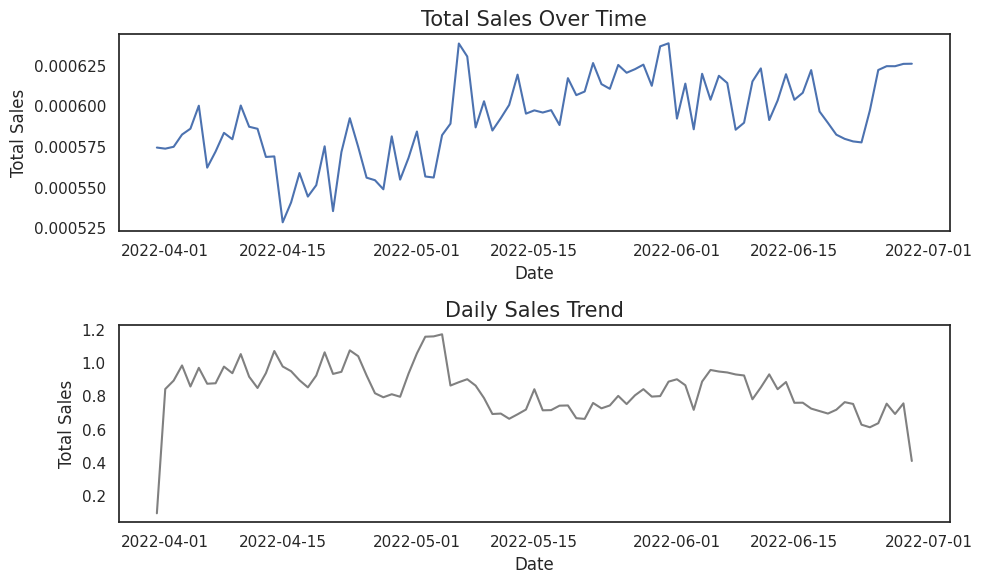

In [54]:
plt.figure(figsize=(10, 6))
sns.set(style='white')
plt.subplot(2,1,1)
sns.lineplot(data=sales_data, x= 'Date', y='Total Sales in Million', ci=None)
plt.title('Total Sales Over Time', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.subplot(2,1,2)
sns. lineplot (data=daily_sales, x='Date', y='Total Sales in Million', color='grey')
plt.title('Daily Sales Trend', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.tight_layout()
plt.show()

In [55]:
monthly_sales = sales_data.groupby('Month')['Total Sales in Million'].sum().reset_index()
monthly_sales

,Month,Total Sales in Million
0,April,27.805861
1,June,22.776386
2,March,0.098261
3,May,25.344862


Text(0, 0.5, 'Total Sales')

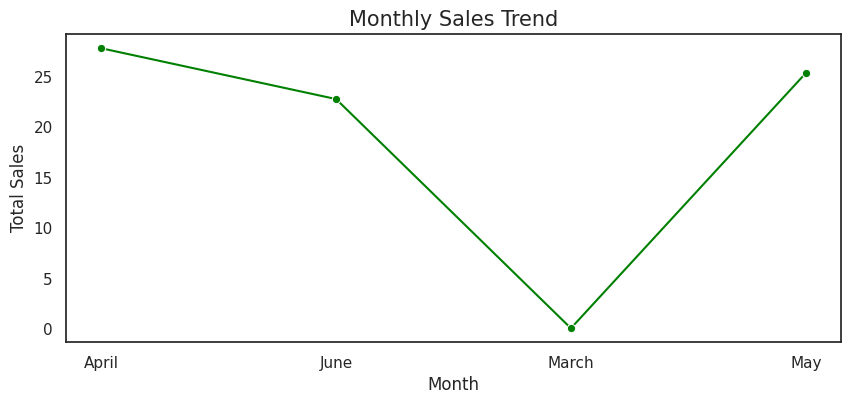

In [56]:
plt.figure(figsize=(10,4))
sns.set(style='white')
sns.lineplot(x='Month', y='Total Sales in Million', data=monthly_sales, color='green', marker='o')
plt.title('Monthly Sales Trend', fontsize=15)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

**week sales trend and sales by day of the week:**

In [57]:
weekly_sales= sales_data.groupby('Week')['Total Sales in Million'].sum().reset_index().sort_values('Total Sales in Million', ascending=False)
weekly_sales

,Week,Total Sales in Million
5,18,7.005260
3,16,6.840369
2,15,6.604734
1,14,6.553733
10,23,6.315305
4,17,6.141171
9,22,6.023705
8,21,5.476505
11,24,5.385475
6,19,5.100345


In [58]:
weekly_sales['week']=weekly_sales['Week'].astype('str')

In [59]:
weekday_sales= sales_data.groupby('Day_Name')['Total Sales in Million'].sum().reset_index().sort_values('Total Sales in Million', ascending=False)
weekday_sales

,Day_Name,Total Sales in Million
5,Tuesday,12.628818
6,Wednesday,12.170677
4,Thursday,11.119816
1,Monday,10.179061
0,Friday,10.062556
2,Saturday,9.935046
3,Sunday,9.929396


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

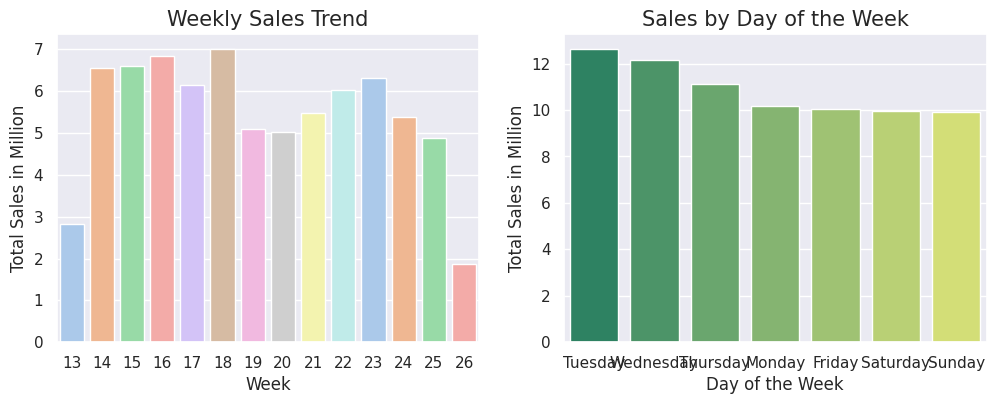

In [60]:
plt.figure(figsize=(12,4))
sns.set(style="darkgrid")
plt.subplot(1,2,1)
sns.barplot(x='Week', y='Total Sales in Million', data=weekly_sales, palette='pastel')
plt.title('Weekly Sales Trend', fontsize=15)
plt.xlabel('Week', fontsize=12)
plt.ylabel('Total Sales in Million', fontsize=12)
sns.set(style='darkgrid')
plt.subplot(1,2,2)
sns.barplot(x='Day_Name', y='Total Sales in Million', data=weekday_sales, palette='summer')
plt.title('Sales by Day of the Week', fontsize=15)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel("Total Sales in Million", fontsize=12)
plt.tight_layout

2. Product Analysis: Analyze the distribution of product categories, sizes, and qutanties sold to identify popular
products:

**analyze product category distrubtion**

In [61]:
category_dist= sales_data['Category'].value_counts()
category_dist

,count
Category,
T-shirt,50207
Shirt,49786
Blazzer,15488
Trousers,10605
Perfume,1157
Wallet,926
Socks,439
Shoes,164
Watch,3


product size distrubtion

In [62]:
size_counts = sales_data['Size'].value_counts()
size_counts

,count
Size,
M,22343
L,21768
XL,20516
XXL,17780
S,16748
3XL,14625
XS,11032
Free,2250
6XL,738


**popular product by category and size**

In [63]:
quantity_sold = sales_data.groupby(['Category', 'Size'])['Quantity'].sum().reset_index()
popular_product=quantity_sold.nlargest(5,   'Quantity')
popular_product

,Category,Size,Quantity
31,T-shirt,M,8346
12,Shirt,L,8031
15,Shirt,XL,7825
13,Shirt,M,7699
30,T-shirt,L,7385


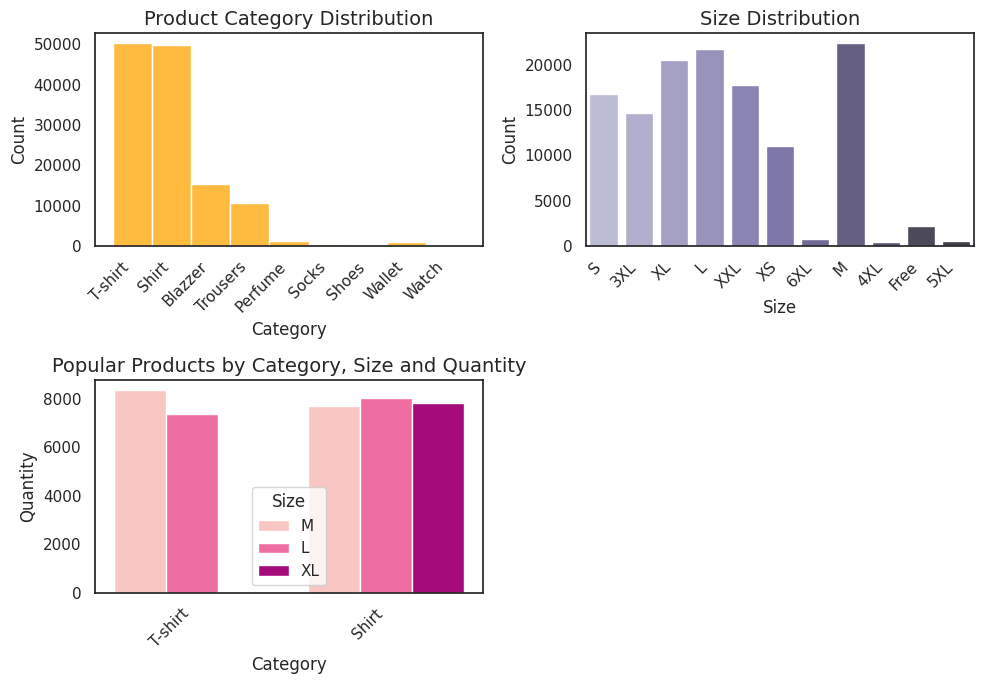

In [64]:
plt.figure(figsize=(10,7))
sns.set(style='white')
plt.subplot(2,2,1)
sns.histplot(x='Category', data=sales_data, color='orange')
plt.title('Product Category Distribution', fontsize=14)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.subplot(2,2,2)
sns.countplot(x='Size', data=sales_data, palette= 'Purples_d')
plt.title('Size Distribution', fontsize=14)
plt.xlabel("Size", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.subplot(2,2,3)
sns.barplot(x='Category', y='Quantity', data=popular_product, hue='Size', palette='RdPu', saturation=0.9)
plt.title('Popular Products by Category, Size and Quantity', fontsize=14)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Quantity", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

3. **Fulfillment Analysis: Investigate the fulfillment methods used and their effectiveness in delivering orders.**


In [65]:
fulfillment_dist= sales_data['Fulfilment'].value_counts().reset_index()
fulfillment_dist

,Fulfilment,count
0,Amazon,89575
1,Merchant,39200


**sucess rate analysis**

In [66]:
success_rate = sales_data[(sales_data['Status'] == 'Shipped - Delivered to Buyer') | (sales_data['Status']=='shipped')].groupby('Fulfilment').size() / sales_data.groupby('Fulfilment').size() * 100
Sr=success_rate.reset_index(name='Success Rate')

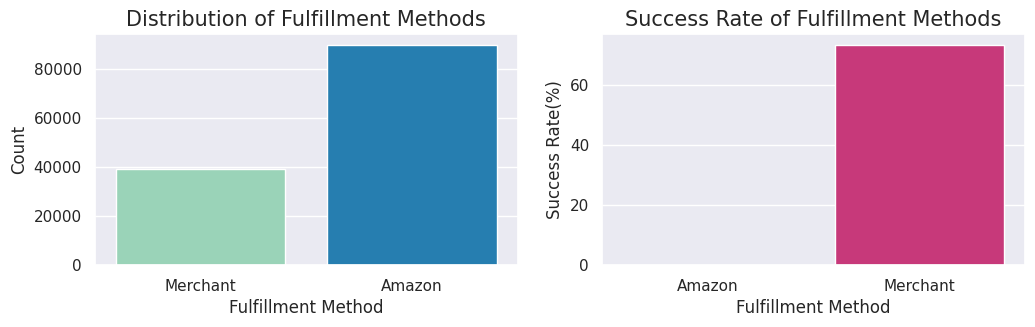

In [67]:
plt.figure(figsize =(12,3))
sns.set(style='darkgrid')
plt.subplot(1,2,1)
sns.countplot(data=sales_data, x='Fulfilment', palette='YlGnBu', saturation=0.9)
plt.title("Distribution of Fulfillment Methods", fontsize=15)
plt.xlabel('Fulfillment Method', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.subplot(1,2,2)
sns.barplot(x='Fulfilment',y='Success Rate',data=Sr,palette='PuRd')
plt.title('Success Rate of Fulfillment Methods', fontsize=15)
plt.xlabel('Fulfillment Method', fontsize=12)
plt.ylabel('Success Rate(%)', fontsize=12)
plt.show()

4. Customer Segmentation: Segment customers based on their buying behaviour, location, and other relevant
factors.

In [68]:
customer_data = sales_data.groupby('Order ID').agg({'Amount': 'sum', 'Quantity': 'sum', 'Quantity': 'sum', 'ship-city': 'first', 'ship-state': 'first', 'ship-postal-code': 'first', 'B2B': 'first'}).reset_index()

In [69]:
customer_data.rename(columns={'Amount': 'Total Amount spent', 'Quantity': 'Total Quantity purchased'}, inplace=True)

In [70]:
print(customer_data.head())

              Order ID  Total Amount spent  Total Quantity purchased  \
0  171-0000547-8192359               301.0                         1   
1  171-0000902-4490745               544.0                         1   
2  171-0001409-6228339               422.0                         1   
3  171-0003082-5110755               563.0                         1   
4  171-0003738-2052324               379.0                         1   

          ship-city     ship-state  ship-postal-code    B2B  
0  PIMPRI CHINCHWAD    MAHARASHTRA            412101  False  
1            Howrah    WEST BENGAL            711104  False  
2             KODAD      TELANGANA            508206  False  
3     GREATER NOIDA  UTTAR PRADESH            201306  False  
4         FIROZABAD  UTTAR PRADESH            283203  False  


In [71]:
features = customer_data[['Total Amount spent', 'Total Quantity purchased']]

In [72]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [73]:
inertia = []
for n in range(1, 11):
  kmeans = KMeans(n_clusters=n, random_state=42)
  kmeans.fit(scaled_features)
  inertia.append(kmeans.inertia_)

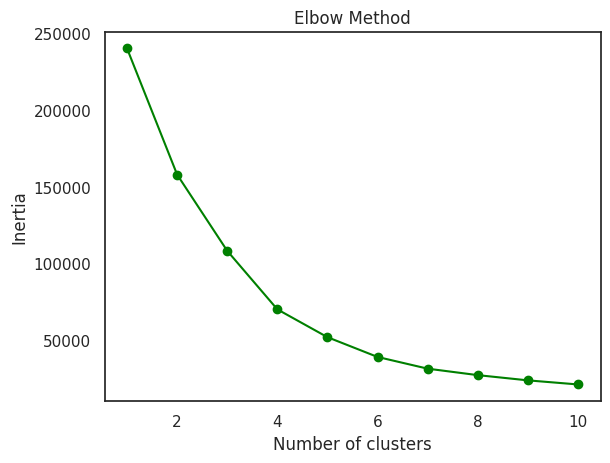

In [74]:
sns.set(style='white')
plt.plot(range(1, 11), inertia, marker='o', color="green")
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [75]:
optimal_clusters = 3

In [76]:
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_features)

In [77]:
print(customer_data.head())

              Order ID  Total Amount spent  Total Quantity purchased  \
0  171-0000547-8192359               301.0                         1   
1  171-0000902-4490745               544.0                         1   
2  171-0001409-6228339               422.0                         1   
3  171-0003082-5110755               563.0                         1   
4  171-0003738-2052324               379.0                         1   

          ship-city     ship-state  ship-postal-code    B2B  Cluster  
0  PIMPRI CHINCHWAD    MAHARASHTRA            412101  False        0  
1            Howrah    WEST BENGAL            711104  False        0  
2             KODAD      TELANGANA            508206  False        0  
3     GREATER NOIDA  UTTAR PRADESH            201306  False        0  
4         FIROZABAD  UTTAR PRADESH            283203  False        0  


In [79]:
cluster_analysis = customer_data.groupby('Cluster').agg({'Total Amount spent': ['mean', 'sum'], 'Total Quantity purchased': ['mean', 'sum'], 'ship-city': 'count', 'ship-state': 'first', 'ship-postal-code': 'first', 'B2B': 'first'}).reset_index()

In [82]:
cluster_analysis.columns = [ 'Avg Amount spent', 'Total Amount spent', 'Avg Quantity purchased', 'Total Quantity purchased', 'customer count', 'Representative City', 'Representative State', 'Representative Postal Code', 'B2B']

In [83]:
cluster_analysis

,Avg Amount spent,Total Amount spent,Avg Quantity purchased,Total Quantity purchased,customer count,Representative City,Representative State,Representative Postal Code,B2B
0,0,649.009248,66385858.00,1.006208,102923,102288,MAHARASHTRA,412101,False
1,1,1521.236652,9106122.60,2.262780,13545,5986,GUJARAT,380015,False
2,2,645.365120,7697269.79,0.000000,0,11927,GUJARAT,382424,False


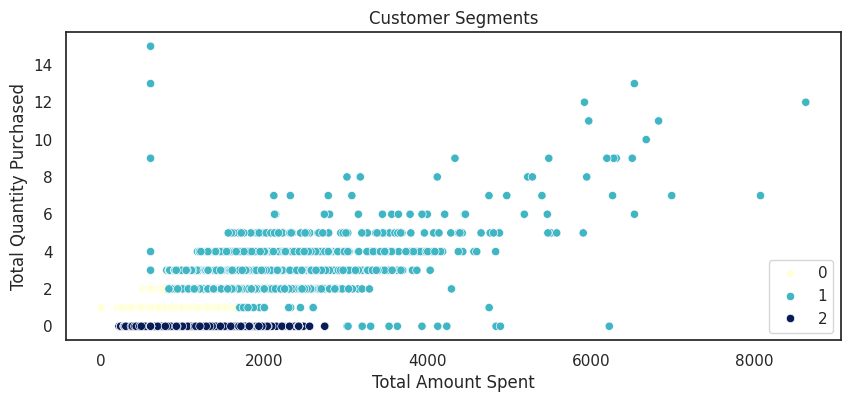

In [90]:
plt.figure(figsize=(10, 4))
sns.set(style='white')
sns.scatterplot(x='Total Amount spent', y='Total Quantity purchased', hue='Cluster', data=customer_data, palette='YlGnBu')
plt.title('Customer Segments')
plt.xlabel('Total Amount Spent')
plt.ylabel('Total Quantity Purchased')
plt.legend(loc='lower right')
plt.show()


**5. Geographical Analysis: Explore the geographical distribution of sales, focusing on states and cities.**


In [107]:
top_sales_states = sales_data.groupby('ship-state')['Total Sales in Million'].sum().reset_index().sort_values(by='Total Sales in Million', ascending=True).head(5)
top_sales_states

,ship-state,Total Sales in Million
5,Arunachal pradesh,0.000602
4,Arunachal Pradesh,0.001235
19,LAKSHADWEEP,0.002441
18,LADAKH,0.036737
8,DADRA AND NAGAR,0.039276


In [108]:
bottom_sales_states = sales_data.groupby('ship-state')['Total Sales in Million'].sum().reset_index().sort_values(by='Total Sales in Million', ascending=True).tail(5)
bottom_sales_states

,ship-state,Total Sales in Million
30,TAMIL NADU,6.505236
33,UTTAR PRADESH,6.553145
31,TELANGANA,6.699150
16,KARNATAKA,10.208746
21,MAHARASHTRA,12.921668


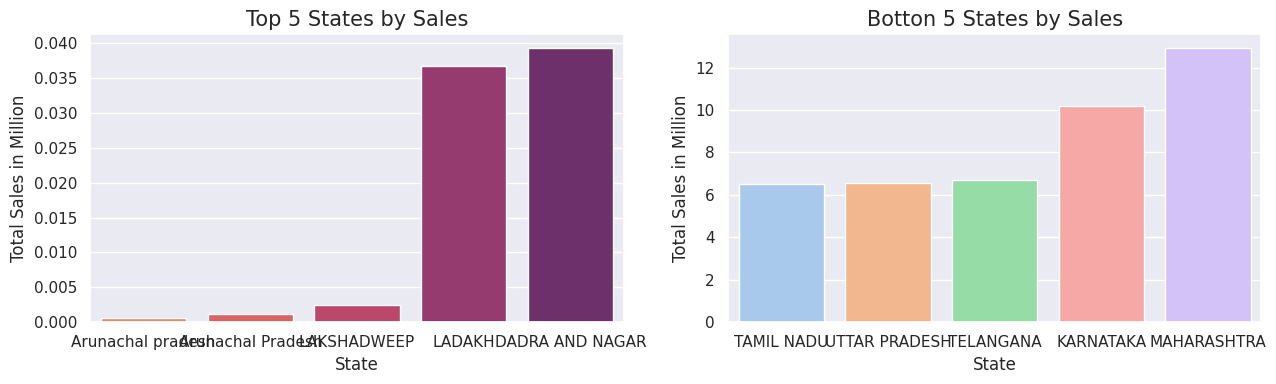

In [110]:
plt.figure(figsize=(13,4))
sns.set(style="darkgrid")
plt.subplot(1,2,1)
sns.barplot(x='ship-state', y='Total Sales in Million',data=top_sales_states,palette='flare', saturation=0.9)
plt.title('Top 5 States by Sales', fontsize=15)
plt.ylabel('Total Sales in Million', fontsize=12)
plt.xlabel('State', fontsize=12)
plt.subplot(1,2,2)
sns.barplot(x='ship-state', y='Total Sales in Million', data=bottom_sales_states, palette='pastel', saturation=0.8)
plt.title('Botton 5 States by Sales', fontsize=15)
plt.ylabel('Total Sales in Million', fontsize=12)
plt.xlabel('State', fontsize=12)
plt.tight_layout()

In [122]:
top_sales_cities = sales_data.groupby('ship-city')['Total Sales in Million'].sum().reset_index().sort_values(by='Total Sales in Million', ascending=True).head(10)
top_sales_cities

,ship-city,Total Sales in Million
704,BARNALa,0.0
4023,"Kanti Nagar extension, Krishna Nagar",0.0
4020,Kanpur dehat,0.0
4009,"Kanjirapally, kottayam",0.0
3996,"Kandivali (W), Mumbai",0.0
690,BARGHAT,0.0
3987,Kanchikacharla,0.0
3962,Kalwa THANE,0.0
701,BARKI SARAIYA,0.0
7328,Shalimar bagh,0.0


In [117]:
bottom_sales_cities = sales_data.groupby('ship-city')['Total Sales in Million'].sum().reset_index().sort_values(by='Total Sales in Million', ascending=True).tail(10)
bottom_sales_cities

,ship-city,Total Sales in Million
4395,LUCKNOW,0.895673
7583,THANE,0.968244
2618,GURUGRAM,1.192451
3710,KOLKATA,1.368826
6156,PUNE,2.270924
1464,CHENNAI,2.994311
5391,NEW DELHI,3.490346
4793,MUMBAI,3.585314
2904,HYDERABAD,4.793958
775,BENGALURU,6.698265


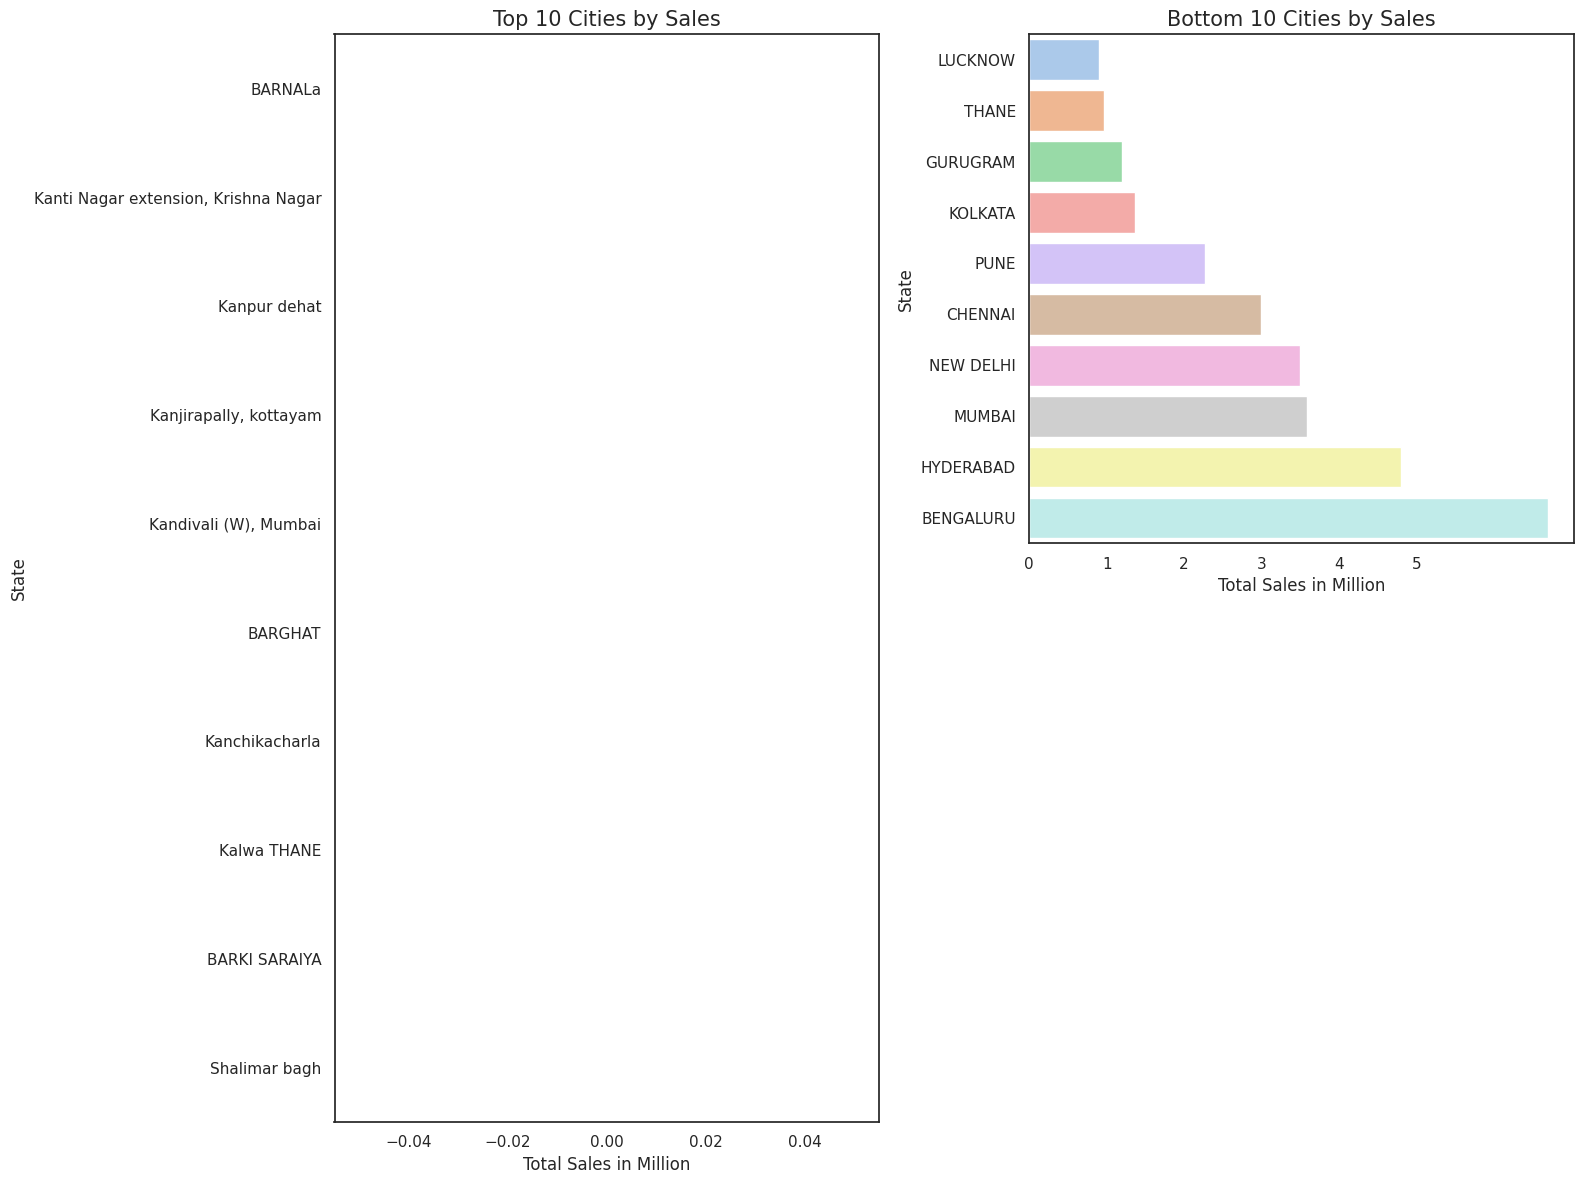

In [124]:
plt.figure(figsize=(16,12))
sns.set(style="white")
plt.subplot(1,2,1)
sns.barplot(y='ship-city', x='Total Sales in Million', data=top_sales_cities, palette='tab20b')
plt.title('Top 10 Cities by Sales', fontsize=15)
plt.xlabel('Total Sales in Million', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.subplot(2,2,2)
sns.barplot(y='ship-city', x='Total Sales in Million', data=bottom_sales_cities, palette='pastel')
plt.title('Bottom 10 Cities by Sales', fontsize=15)
plt.xlabel('Total Sales in Million', fontsize=12)
plt.ylabel("State", fontsize=12)
plt.xticks([0, 1, 2, 3, 4, 5])
plt.tight_layout()

**6.Business Insights: Provide actionable insights and recommendations based on the analysis to optimize sales strategies, improve customer satisfaction, and enhance overall business performance.**

**Optimize Sales Strategies:**

**Focus on Popular Products:** You identified the top-selling product categories and sizes. Consider
Increasing stock and variety within these categories.
Running targeted marketing campaigns highlighting these products.
Bundling popular products together for promotions.

**Capitalize on Peak Sales Periods:** Your analysis revealed weekly and daily sales trends. Use this information to:
Schedule appropriate staffing levels to handle increased demand.
Plan promotions or discounts during high-traffic periods.
Adjust inventory levels to avoid stockouts during peak seasons.
Improve Customer Satisfaction
Enhance Fulfillment Efficiency: You analyzed the success rates of different fulfillment methods.

# **To improve customer satisfaction:**
Address any issues with underperforming fulfillment methods.
Consider offering expedited shipping options for time-sensitive customers.
Communicate clearly with customers about shipping expectations and potential delays.

**Personalize Customer Experience:** Your customer segmentation analysis revealed distinct customer groups.

** Leverage this information to:**
Tailor marketing messages and promotions to specific customer segments.
Develop loyalty programs or exclusive offers for high-value customers.
Provide personalized product recommendations based on customer preferences.

**Enhance Overall Business Performance**

**Target Underperforming Regions:** Your geographical analysis identified states and cities with lower sales.

** To improve performance:**
Investigate the reasons for lower sales in these areas.
Consider targeted marketing campaigns or partnerships to increase brand awareness.
Evaluate the feasibility of expanding distribution channels in these regions.
Monitor and Adapt: Continuously track key metrics and analyze sales data to identify emerging trends and patterns. This will enable you toAdapt your sales strategies and marketing efforts as needed.Stay ahead of the competition and capitalize on new opportunities.
Make data-driven decisions to optimize your overall business performance.